<a href="https://colab.research.google.com/github/sapinspys/DS-Unit-2-Kaggle-Challenge/blob/master/DS7_Sprint_Challenge_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science, Unit 2_
 
# Sprint Challenge: Predict Steph Curry's shots 🏀

For your Sprint Challenge, you'll use a dataset with all Steph Curry's NBA field goal attempts. (Regular season and playoff games, from October 28, 2009, through June 5, 2019.) 

You'll predict whether each shot was made, using information about the shot and the game. This is hard to predict! Try to get above 60% accuracy. The dataset was collected with the [nba_api](https://github.com/swar/nba_api) Python library.

In [0]:
import sys
in_colab = 'google.colab' in sys.modules

if in_colab:
    # Install packages in Colab
    !pip install category_encoders==2.0.0
    !pip install pandas-profiling==2.3.0
    !pip install plotly==4.1.1

In [0]:
import pandas as pd

# Read data
url = 'https://drive.google.com/uc?export=download&id=1fL7KPyxgGYfQDsuJoBWHIWwCAf-HTFpX'
df = pd.read_csv(url)

# Check data shape
assert df.shape == (13958, 20)

To demonstrate mastery on your Sprint Challenge, do all the required, numbered instructions in this notebook.

To earn a score of "3", also do all the stretch goals.

You are permitted and encouraged to do as much data exploration as you want.

**1. Begin with baselines for classification.** Your target to predict is `shot_made_flag`. What is your baseline accuracy, if you guessed the majority class for every prediction?

**2. Hold out your test set.** Use the 2018-19 season to test. NBA seasons begin in October and end in June. You'll know you've split the data correctly when your test set has 1,709 observations.

**3. Engineer new feature.** Engineer at least **1** new feature, from this list, or your own idea.
- **Homecourt Advantage**: Is the home team (`htm`) the Golden State Warriors (`GSW`) ?
- **Opponent**: Who is the other team playing the Golden State Warriors?
- **Seconds remaining in the period**: Combine minutes remaining with seconds remaining, to get the total number of seconds remaining in the period.
- **Seconds remaining in the game**: Combine period, and seconds remaining in the period, to get the total number of seconds remaining in the game. A basketball game has 4 periods, each 12 minutes long.
- **Made previous shot**: Was Steph Curry's previous shot successful?

**4. Decide how to validate** your model. Choose one of the following options. Any of these options are good. You are not graded on which you choose.
- **Train/validate/test split: train on the 2009-10 season through 2016-17 season, validate with the 2017-18 season.** You'll know you've split the data correctly when your train set has 11,081 observations, and your validation set has 1,168 observations.
- **Train/validate/test split: random 80/20%** train/validate split.
- **Cross-validation** with independent test set. You may use any scikit-learn cross-validation method.

**5.** Use a scikit-learn **pipeline** to **encode categoricals** and fit a **Decision Tree** or **Random Forest** model.

**6.** Get your model's **validation accuracy.** (Multiple times if you try multiple iterations.) 

**7.** Get your model's **test accuracy.** (One time, at the end.)


**8.** Given a **confusion matrix** for a hypothetical binary classification model, **calculate accuracy, precision, and recall.**

### Stretch Goals
- Engineer 4+ new features total, either from the list above, or your own ideas.
- Make 2+ visualizations to explore relationships between features and target.
- Optimize 3+ hyperparameters by trying 10+ "candidates" (possible combinations of hyperparameters). You can use `RandomizedSearchCV` or do it manually.
- Get and plot your model's feature importances.



In [0]:
# !pip install pandas-profiling

In [0]:
# import pandas_profiling

# df.profile_report(style={'full_width': True})

## 1. Begin with baselines for classification. 

>Your target to predict is `shot_made_flag`. What would your baseline accuracy be, if you guessed the majority class for every prediction?

In [0]:
y_train = df.shot_made_flag
y_train.value_counts(normalize=True)

0    0.527081
1    0.472919
Name: shot_made_flag, dtype: float64

In [0]:
majority_class = y_train.mode()[0]
majority_class

0

In [0]:
y_pred = [majority_class] * len(y_train)
len(y_pred)

13958

In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_pred)

0.5270812437311936

In [0]:
# Starting out from 52% baseline accuracy and the goal is 60%+, not bad!

## 2. Hold out your test set.

>Use the 2018-19 season to test. NBA seasons begin in October and end in June. You'll know you've split the data correctly when your test set has 1,709 observations.

In [0]:
df.describe()

,game_id,game_event_id,period,minutes_remaining,seconds_remaining,shot_distance,loc_x,loc_y,shot_made_flag,scoremargin_before_shot
count,1.395800e+04,13958.000000,13958.000000,13958.000000,13958.000000,13958.000000,13958.000000,13958.000000,13958.000000,13958.000000
mean,2.442837e+07,270.438458,2.412380,4.727540,28.506376,17.600373,-0.554162,131.257988,0.472919,1.615561
std,7.226620e+06,169.927170,1.125828,3.331646,17.597701,10.295807,124.721869,102.666562,0.499284,10.127139
min,2.090002e+07,2.000000,1.000000,0.000000,0.000000,0.000000,-250.000000,-41.000000,0.000000,-39.000000
25%,2.120091e+07,109.000000,1.000000,2.000000,13.000000,8.000000,-96.000000,23.000000,0.000000,-4.000000
50%,2.150026e+07,275.500000,2.000000,4.000000,29.000000,22.000000,1.000000,141.000000,0.000000,1.000000
75%,2.170096e+07,398.000000,3.000000,7.000000,44.000000,25.000000,95.000000,219.000000,1.000000,8.000000
max,4.180040e+07,752.000000,6.000000,11.000000,59.000000,83.000000,247.000000,811.000000,1.000000,43.000000


In [0]:
df.describe(exclude="number")

,player_name,action_type,shot_type,shot_zone_basic,shot_zone_area,shot_zone_range,game_date,htm,vtm,season_type
count,13958,13958,13958,13958,13958,13958,13958,13958,13958,13958
unique,1,53,2,7,6,5,801,32,32,2
top,Stephen Curry,Jump Shot,2PT Field Goal,Above the Break 3,Center(C),24+ ft.,2013-05-06,GSW,GSW,Regular Season
freq,13958,6657,7135,5695,5987,6721,35,6871,7087,11846


In [0]:
df.game_date.describe()

count          13958
unique           801
top       2013-05-06
freq              35
Name: game_date, dtype: object

In [0]:
df['game_date'] = pd.to_datetime(df['game_date'], infer_datetime_format=True)

In [0]:
df.game_date.describe()

count                   13958
unique                    801
top       2013-05-06 00:00:00
freq                       35
first     2009-10-28 00:00:00
last      2019-06-05 00:00:00
Name: game_date, dtype: object

In [0]:
df[(df.game_date >= 'October 2018') & (df.game_date <= 'July 2019')].game_date

12249   2018-10-16
12250   2018-10-16
12251   2018-10-16
12252   2018-10-16
12253   2018-10-16
           ...    
13953   2019-06-05
13954   2019-06-05
13955   2019-06-05
13956   2019-06-05
13957   2019-06-05
Name: game_date, Length: 1709, dtype: datetime64[ns]

In [0]:
df[(df.game_date < 'October 2018')].game_date

0       2009-10-28
1       2009-10-28
2       2009-10-28
3       2009-10-28
4       2009-10-28
           ...    
12244   2018-06-08
12245   2018-06-08
12246   2018-06-08
12247   2018-06-08
12248   2018-06-08
Name: game_date, Length: 12249, dtype: datetime64[ns]

In [0]:
test = df[(df.game_date >= 'October 2018') & (df.game_date <= 'July 2019')]
test.shape

(1709, 20)

In [0]:
train = df[df.game_date < 'October 2018']
train.shape

(12249, 20)

In [0]:
assert len(test) + len(train) == len(df)

## 3. Engineer new feature.

>Engineer at least **1** new feature, from this list, or your own idea.
>
>- **Homecourt Advantage**: Is the home team (`htm`) the Golden State Warriors (`GSW`) ?
>- **Opponent**: Who is the other team playing the Golden State Warriors?
>- **Seconds remaining in the period**: Combine minutes remaining with seconds remaining, to get the total number of seconds remaining in the period.
>- **Seconds remaining in the game**: Combine period, and seconds remaining in the period, to get the total number of seconds remaining in the game. A basketball game has 4 periods, each 12 minutes long.
>- **Made previous shot**: Was Steph Curry's previous shot successful?

    

In [0]:
df.columns.to_list()

['game_id',
 'game_event_id',
 'player_name',
 'period',
 'minutes_remaining',
 'seconds_remaining',
 'action_type',
 'shot_type',
 'shot_zone_basic',
 'shot_zone_area',
 'shot_zone_range',
 'shot_distance',
 'loc_x',
 'loc_y',
 'shot_made_flag',
 'game_date',
 'htm',
 'vtm',
 'season_type',
 'scoremargin_before_shot']

In [0]:
def feature_engineer(X):
    """Takes in dataframe and engineers the following features."""
    # Prevent SettingWithCopyWarning
    X = X.copy()
    
    #Homecourt Advantage: Is the home team (htm) the Golden State Warriors (GSW) ?
    X['homecourt_advantage'] = X.htm == 'GSW'
        
    # Extract components from date_recorded, then drop the original column
    X['game_year'] = X['game_date'].dt.year
    X['game_month'] = X['game_date'].dt.month
    X['game_day'] = X['game_date'].dt.day
    
    # In North American sports, "running up the score" occurs when 
    # a team continues to play in such a way as to score additional points 
    # after the outcome of the game is no longer in question and the team is 
    # assured of winning. In the United States and Canada, it is considered 
    # poor sportsmanship to "run up the score" in most circumstances 
    X['running_up_score'] = X.scoremargin_before_shot < 0
    
    # Score is currently tied
    X['tied'] = X.scoremargin_before_shot == 0
    
    # return the wrangled dataframe
    return X

In [0]:
train = feature_engineer(train)
test = feature_engineer(test)

In [0]:
train.head()

,game_id,game_event_id,player_name,period,minutes_remaining,seconds_remaining,action_type,shot_type,shot_zone_basic,shot_zone_area,...,htm,vtm,season_type,scoremargin_before_shot,homecourt_advantage,game_year,game_month,game_day,running_up_score,tied
0,20900015,4,Stephen Curry,1,11,25,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),...,GSW,HOU,Regular Season,2.0,True,2009,10,28,False,False
1,20900015,17,Stephen Curry,1,9,31,Step Back Jump shot,2PT Field Goal,Mid-Range,Left Side Center(LC),...,GSW,HOU,Regular Season,0.0,True,2009,10,28,False,True
2,20900015,53,Stephen Curry,1,6,2,Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),...,GSW,HOU,Regular Season,-4.0,True,2009,10,28,True,False
3,20900015,141,Stephen Curry,2,9,49,Jump Shot,2PT Field Goal,Mid-Range,Left Side(L),...,GSW,HOU,Regular Season,-4.0,True,2009,10,28,True,False
4,20900015,249,Stephen Curry,2,2,19,Jump Shot,2PT Field Goal,Mid-Range,Left Side Center(LC),...,GSW,HOU,Regular Season,0.0,True,2009,10,28,False,True


## **4. Decide how to validate** your model. 

>Choose one of the following options. Any of these options are good. You are not graded on which you choose.
>
>- **Train/validate/test split: train on the 2009-10 season through 2016-17 season, validate with the 2017-18 season.** You'll know you've split the data correctly when your train set has 11,081 observations, and your validation set has 1,168 observations.
>- **Train/validate/test split: random 80/20%** train/validate split.
>- **Cross-validation** with independent test set. You may use any scikit-learn cross-validation method.

In [0]:
# X = X.drop(columns='game_date')
# train = train[(train.game_year <) ]
train_subset = train[(train.game_date >= 'October 2009') & (train.game_date <= 'July 2017')]
train.game_date

0       2009-10-28
1       2009-10-28
2       2009-10-28
3       2009-10-28
4       2009-10-28
           ...    
12244   2018-06-08
12245   2018-06-08
12246   2018-06-08
12247   2018-06-08
12248   2018-06-08
Name: game_date, Length: 12249, dtype: datetime64[ns]

In [0]:
val = train[(train.game_date >= 'October 2017') & (train.game_date <= 'July 2018')]
val.game_date

11081   2017-10-17
11082   2017-10-17
11083   2017-10-17
11084   2017-10-17
11085   2017-10-17
           ...    
12244   2018-06-08
12245   2018-06-08
12246   2018-06-08
12247   2018-06-08
12248   2018-06-08
Name: game_date, Length: 1168, dtype: datetime64[ns]

In [0]:
test.game_date

12249   2018-10-16
12250   2018-10-16
12251   2018-10-16
12252   2018-10-16
12253   2018-10-16
           ...    
13953   2019-06-05
13954   2019-06-05
13955   2019-06-05
13956   2019-06-05
13957   2019-06-05
Name: game_date, Length: 1709, dtype: datetime64[ns]

In [0]:
assert len(train_subset) + len(val) + len(test) == len(df)

## 5. Use a scikit-learn pipeline to encode categoricals and fit a Decision Tree or Random Forest model.

In [0]:
target = 'shot_made_flag'
datetime = 'game_date'

X_train = train_subset.drop(columns=[target, datetime])
X_val = val.drop(columns=[target, datetime])
X_test = test.drop(columns=[target, datetime])

y_train = train_subset[target]
y_val = val[target]
y_test = test[target]

In [0]:
assert len(X_train) + len(X_val) + len(X_test) == len(df)

In [0]:
assert len(y_train) + len(y_val) + len(y_test) == len(df[target])

In [0]:
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='mean'), 
    RandomForestClassifier(n_estimators=100, random_state=42)
)

## 6.Get your model's validation accuracy

> (Multiple times if you try multiple iterations.)

In [0]:
pipeline.fit(X_train, y_train);
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.5873287671232876


### 6.4 Explore and wrangle

In [0]:
!pip install pandas-profiling

In [0]:
import pandas_profiling

X_train.profile_report(style={'full_width':True})

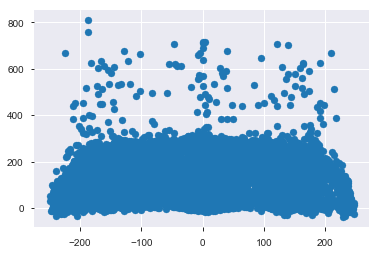

In [0]:
# Are the zeros for loc x and loc y normal?
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(df.loc_x, df.loc_y)

In [0]:
def wrangle(X):
    """Accepts dataframe and returns wrangled dataframe."""
    X = X.copy()   
    
    # Drop player_name (never varies) 
    unusable_variance = ['player_name']
    X = X.drop(columns=unusable_variance)
    
    # Drop highly correlated columns
    highly_correlated = ['period']
    X = X.drop(columns=highly_correlated)
        
    return X

In [0]:
X_train = wrangle(X_train)
X_val = wrangle(X_val)
X_test = wrangle(X_test)

In [0]:
assert len(X_train) + len(X_val) + len(X_test) == len(df)

In [0]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='mean'), 
    RandomForestClassifier(n_estimators=100, random_state=42)
)

In [0]:
pipeline.fit(X_train, y_train);
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.5941780821917808


### 6.5 Tune the hyperparameters

In [0]:
import numpy as np

param_distributions = {
    'randomforestclassifier__n_estimators': [int(x) for x in np.linspace(start = 10, stop = 200, num = 3)], 
    'randomforestclassifier__max_depth': [5, 15, 30, 50, None], 
    'randomforestclassifier__max_features': [0.1, 0.5, 1, 'auto', 'sqrt'], 
    'randomforestclassifier__min_samples_leaf': [1, 4, 8],
    'randomforestclassifier__min_samples_split': [2, 5, 10],
}

print(param_distributions)

{'randomforestclassifier__n_estimators': [10, 105, 200], 'randomforestclassifier__max_depth': [5, 15, 30, 50, None], 'randomforestclassifier__max_features': [0.1, 0.5, 1, 'auto', 'sqrt'], 'randomforestclassifier__min_samples_leaf': [1, 4, 8], 'randomforestclassifier__min_samples_split': [2, 5, 10]}


In [0]:
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='mean'), 
    RandomForestClassifier(n_estimators=100, random_state=42)
)

search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_distributions, 
    n_iter=50, 
    cv=3, 
    scoring='accuracy', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1
)

In [0]:
search.fit(X_train, y_train);
print('Validation Accuracy', search.score(X_val, y_val))

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   21.4s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   27.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   29.6s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   33.5s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   46.0s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   52.1s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.2min finished


Validation Accuracy 0.6113013698630136


In [0]:
search.best_params_

{'randomforestclassifier__n_estimators': 10,
 'randomforestclassifier__min_samples_split': 2,
 'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__max_features': 0.5,
 'randomforestclassifier__max_depth': 5}

## 7. Get your model's test accuracy

> (One time, at the end.)

In [0]:
y_pred = search.predict(X_test)

In [0]:
from sklearn.metrics import accuracy_score
print('Test Accuracy', accuracy_score(y_test, y_pred))

Test Accuracy 0.6220011702750147


## 8. Given a confusion matrix, calculate accuracy, precision, and recall.

Imagine this is the confusion matrix for a binary classification model. Use the confusion matrix to calculate the model's accuracy, precision, and recall.

<table>
  <tr>
    <td colspan="2" rowspan="2"></td>
    <td colspan="2">Predicted</td>
  </tr>
  <tr>
    <td>Negative</td>
    <td>Positive</td>
  </tr>
  <tr>
    <td rowspan="2">Actual</td>
    <td>Negative</td>
    <td style="border: solid">85</td>
    <td style="border: solid">58</td>
  </tr>
  <tr>
    <td>Positive</td>
    <td style="border: solid">8</td>
    <td style="border: solid"> 36</td>
  </tr>
</table>

### Calculate accuracy 

In [0]:
correct_predictions = 85 + 36
correct_predictions

121

In [0]:
# Very nice! Already hit MVP

In [0]:
total_predictions = 85 + 36 + 58 + 8
total_predictions

187

In [0]:
accuracy = correct_predictions / total_predictions
accuracy

0.6470588235294118

### Calculate precision

In [0]:
correct_predictions_positive = 36
total_predictions_positive = 36 + 58

In [0]:
positive_precision = correct_predictions_positive / total_predictions_positive
positive_precision

0.3829787234042553

In [0]:
correct_predictions_negative = 85
total_predictions_negative = 85 + 8

In [0]:
negative_precision = correct_predictions_negative / total_predictions_negative
negative_precision

0.9139784946236559

### Calculate recall

In [0]:
actual_positive = 8 + 36

In [0]:
positive_recall = correct_predictions_positive / actual_positive
positive_recall

0.8181818181818182

In [0]:
actual_negative = 85 + 58

In [0]:
negative_recall = correct_predictions_negative / actual_negative
negative_recall

0.5944055944055944

## 9. Get and Interpret Confusion Matrix

In [0]:
# This was a matplotlib regression introduced in 3.1.1 which has been 
# fixed in 3.1.2 (still forthcoming). For now the fix is to downgrade 
# matplotlib to a prior version.

!pip install matplotlib==3.0.3
import matplotlib
print(matplotlib.__version__)

3.0.3


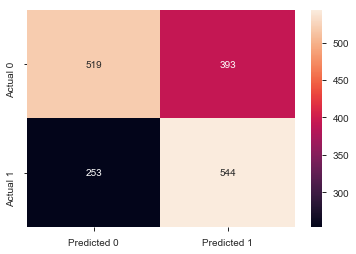

In [0]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# confusion_matrix(y_val, y_pred)
# unique_labels(y_pred)

# 1. Create correct labels.

def plot_confusion_matrix(y_true, y_pred):
  labels = unique_labels(y_pred)
  columns = [f'Predicted {label}' for label in labels]
  index = [f'Actual {label}' for label in labels]

  table = pd.DataFrame(confusion_matrix(y_true, y_pred), columns=columns, index=index)
  
  return sns.heatmap(table, annot=True, fmt='d')
  
plot_confusion_matrix(y_test, y_pred);


In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.57      0.62       912
           1       0.58      0.68      0.63       797

    accuracy                           0.62      1709
   macro avg       0.63      0.63      0.62      1709
weighted avg       0.63      0.62      0.62      1709

